In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import sklearn.externals
import joblib 
import IPython.display 
import sklearn.tree 
import pydotplus
import os

In [2]:
data_doh = pd.read_csv('12-benign-doh.csv', delimiter=',')
data_doh['DoH'] = 'DoH'
data_doh = data_doh.rename(columns={'DoH': 'Label'})
print(f'Number of malicious = {len(data_doh)}')
data_doh.head()

Number of malicious = 19807


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:49,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,DoH
1,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:50,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,DoH
2,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:52,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,DoH
3,192.168.20.191,176.103.130.131,50749,443,2020/1/14 15:54,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,DoH
4,176.103.130.131,192.168.20.191,443,50749,2020/1/14 15:56,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,DoH


In [3]:
data_mal = pd.read_csv('mal-dns2tcp.csv', delimiter=',')
data_mal['DoH'] = 'dns2tcp'
df2_malic = pd.read_csv('mal-dnscat2.csv', delimiter=',')
df2_malic['DoH'] = 'dnscat2'
df3_malic = pd.read_csv('mal-iodine.csv', delimiter=',')
df3_malic['DoH'] = 'iodine'
data_mal = pd.concat([data_mal,df2_malic])
data_mal = pd.concat([data_mal,df3_malic])
data_mal = data_mal.rename(columns={'DoH': 'Label'})
print(f'Number of malicious = {len(data_mal)}')
data_mal.head()

Number of malicious = 249969


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.209,1.1.1.1,39406,443,2020-04-01 22:55:13,120.772871,42357,350.716180,71915,595.456574,...,0.489724,4.023502e-01,0.634311,0.163861,0.001734,0.000006,0.766785,0.258319,3.871039,dns2tcp
1,1.1.1.1,192.168.20.209,443,39406,2020-04-01 22:57:14,120.656643,78950,654.336123,46138,382.390881,...,0.617101,1.243765e-08,0.000112,0.000050,0.000034,0.000021,0.433249,0.260983,2.225769,dns2tcp
2,1.1.1.1,192.168.20.209,443,39406,2020-04-01 22:59:15,120.692061,78559,650.904453,46805,387.805127,...,0.617322,8.999716e-09,0.000095,0.000046,0.000031,0.000024,0.471856,0.231073,2.065863,dns2tcp
3,1.1.1.1,192.168.20.209,443,39406,2020-04-01 23:01:15,120.644016,78133,647.632619,46444,384.967291,...,0.608922,7.678121e-09,0.000088,0.000048,0.000035,0.000021,0.444360,0.307892,1.826318,dns2tcp
4,1.1.1.1,192.168.20.209,443,39406,2020-04-01 23:03:16,120.883686,79169,654.918812,47193,390.400074,...,0.615777,1.310879e-08,0.000114,0.000048,0.000030,0.000018,0.470369,0.261599,2.387701,dns2tcp


In [4]:
data_nodoh = pd.read_csv('12-benign-nodoh-firefox.csv', delimiter=',')
data_nodoh1 = pd.read_csv('12-benign-nohoh-chrome.csv', delimiter=',')
data_nodoh = pd.concat([data_nodoh,data_nodoh1])
data_nodoh['DoH'] = 'NonDoH' 
data_nodoh = data_nodoh.rename(columns={'DoH': 'Label'})
print(f'Number of malicious = {len(data_nodoh)}')
data_nodoh.head()

Number of malicious = 897493


,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.111,8.8.8.8,49972,443,2019/12/10 13:14,0.017147,171,9972.589957,105,6123.520149,...,0.707107,0.000000,0.000000,0.017120,0.017120,0.017120,-10.000000,-10.000000,0.000000,NonDoH
1,192.168.20.111,8.8.8.8,50028,443,2019/12/10 13:14,0.954806,2555,2675.936263,5675,5943.615771,...,1.353916,0.000084,0.009147,0.010709,0.008997,0.000004,0.561552,1.170332,0.854139,NonDoH
2,192.168.20.111,8.8.8.8,50092,443,2019/12/10 13:14,1.646289,8465,5141.867558,10845,6587.543256,...,0.549101,0.000064,0.007990,0.010945,0.015319,0.000003,-1.642429,1.369527,0.729979,NonDoH
3,192.168.20.111,54.72.229.126,60540,443,2019/12/10 13:14,1.132705,1751,1545.857041,4504,3976.322167,...,0.847468,0.001276,0.035717,0.079840,0.095209,0.000012,-1.290885,2.235006,0.447359,NonDoH
4,192.168.20.111,54.191.252.154,50928,443,2019/12/10 13:14,1.170098,2351,2009.233415,4633,3959.497410,...,0.806748,0.001192,0.034518,0.054705,0.082358,0.000016,-2.403374,1.584345,0.630991,NonDoH


In [5]:
print(data_nodoh.groupby('Label').size())

Label
NonDoH    897493
dtype: int64


In [6]:
dataset = pd.concat([data_doh,data_nodoh])
dataset = pd.concat([dataset,data_mal])
print(dataset.shape)
print(dataset.groupby('Label').size())

(1167269, 35)
Label
DoH         19807
NonDoH     897493
dns2tcp    167517
dnscat2     35854
iodine      46598
dtype: int64


In [7]:
null = dataset.isnull()
print(dataset.isnull().any().any())
print(null.sum())
dataset['ResponseTimeTimeMedian'] = dataset['ResponseTimeTimeMedian'].fillna(0)
dataset['ResponseTimeTimeSkewFromMedian'] = dataset['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = dataset.isnull()
print("New: ", dataset.isnull().any().any())
print("New: ", null.sum())

True
SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTimeMean                               0
PacketTi

In [8]:
dataset.columns
cols = dataset.drop(labels = ['TimeStamp','SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort','Duration','FlowBytesSent','FlowSentRate', 'PacketTimeSkewFromMedian'], axis = 1)
cols.columns

Index(['FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean',
       'ResponseTimeTimeMedian', 'ResponseTimeTimeMode',
       'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'Label'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
array = cols.values
print(array)
X = array[:,0:25]
Y = array[:,25]
#Y = Y.astype('int')
validation_size = 0.30
seed = 65
# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 使用 fit_transform 方法对特征进行缩放
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

[[65358 687.3888783 7474.676771 ... 0.024714815 1.174947648 'DoH']
 [101232 827.6720176 10458.1186 ... -0.07584524 1.402381756 'DoH']
 [38236 316.1086447 7300.293933 ... 0.085061157 0.958347923 'DoH']
 ...
 [41495 343.1591753862273 220428.0018502017 ... 0.8468200856265894
  1.1808181546927088 'iodine']
 [39744 330.94449154743006 215508.35836071672 ... 0.8566471369471551
  1.1672735373019458 'iodine']
 [22225 341.7429731186592 214804.5394637845 ... 0.8594896211345133
  1.1634139138982285 'iodine']]


In [11]:
scoring = 'accuracy'
print(scoring)
X_test.shape

accuracy


(350181, 25)

In [12]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [13]:
estimators = [('lgbm', lgb.LGBMClassifier()), ('rf', RandomForestClassifier())]
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())

In [14]:
models = []
models.append(('SC', stacking))
print(models)

[('SC', StackingClassifier(estimators=[('lgbm', LGBMClassifier()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=RandomForestClassifier()))]


In [15]:
print("训练集 X_train 形状:", X_train.shape)
print("训练集 Y_train 形状:", Y_train.shape)
print("测试集 X_test 形状:", X_test.shape)
print("测试集 Y_test 形状:", Y_test.shape)

训练集 X_train 形状: (817088, 25)
训练集 Y_train 形状: (817088,)
测试集 X_test 形状: (350181, 25)
测试集 Y_test 形状: (350181,)


In [16]:
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle = True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        print(cv_results)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

[0.98372272 0.9839369  0.98347183 0.98334323 0.98331875]
SC Accuracy: 0.983559 (+/- 0.000237)


stacking Accuracy test set result
0.9857330923151171
ETC accuracy test:
 0.9857330923151171

Confusion Matrix:
 [[  4362   1584      1      0      0]
 [  1070 268241      8      3      2]
 [     0      7  49673    313    276]
 [     0      5    228   9678    773]
 [     0     10    162    554  13231]]

Classfication report:
               precision    recall  f1-score   support

         DoH       0.80      0.73      0.77      5947
      NonDoH       0.99      1.00      1.00    269324
     dns2tcp       0.99      0.99      0.99     50269
     dnscat2       0.92      0.91      0.91     10684
      iodine       0.93      0.95      0.94     13957

    accuracy                           0.99    350181
   macro avg       0.93      0.91      0.92    350181
weighted avg       0.99      0.99      0.99    350181



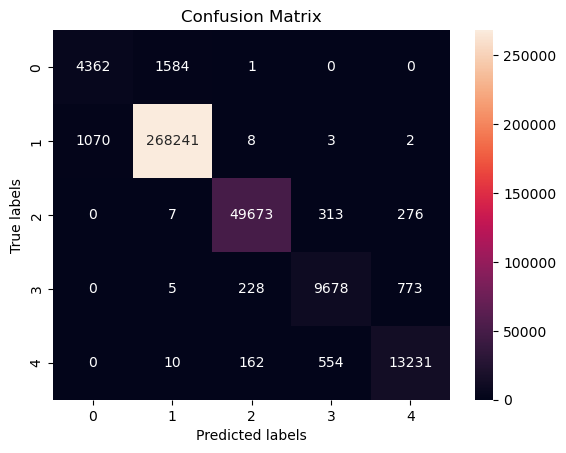

Validating Feature importance
[0.02527696 0.02143104 0.02757079 0.03943648 0.05390663 0.03716896
 0.05883911 0.04461543 0.02910597 0.06792319 0.07378613 0.11764139
 0.08729762 0.05702685 0.0040024  0.02000726 0.04773895 0.01043082
 0.01666843 0.02123946 0.02588266 0.01478364 0.04153838 0.03399646
 0.02268503]


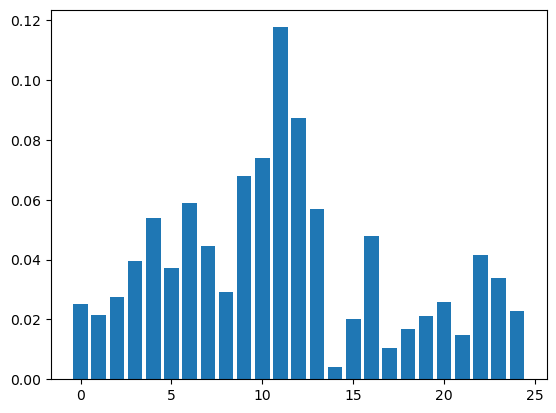

<Axes: >

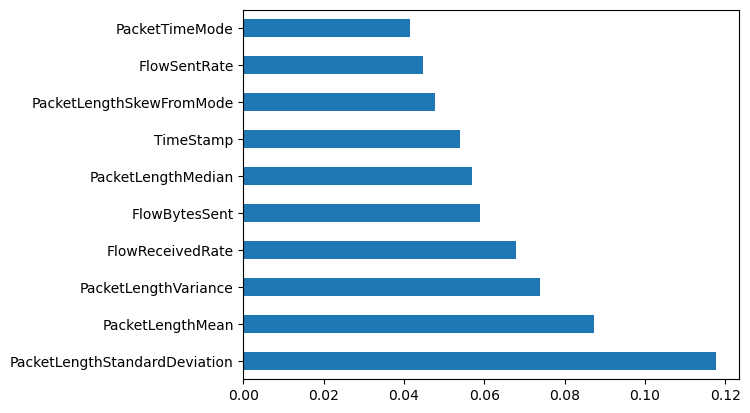

In [18]:
print("stacking Accuracy test set result")
etc = stacking
etc.fit(X_train, Y_train)
filename = 'finalized_RFC_model.sav'
joblib.dump(etc, filename)
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)

predictions_etc = etc.predict(X_test)
print("ETC accuracy test:\n",accuracy_score(Y_test, predictions_etc))
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, predictions_etc))
print("\nClassfication report:\n",classification_report(Y_test, predictions_etc))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(Y_test, predictions_etc)
sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print ("Validating Feature importance")
#fit an Extra Trees model to the data
test_model = ExtraTreesClassifier()
test_model.fit(X_train, Y_train)
#display the relative importance of each attribute
print(test_model.feature_importances_)
#plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()

df = dataset.reset_index(drop = False)
feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[0:25])
feat_importances.nlargest(10).plot(kind='barh')